# 2022卡塔尔世界杯数据分析

本实验结果是各项指标针对于“胜/平/负”分类预测的重要性分析，不涉及“比分”或“进球数”相关的回归分析。

In [1]:
! pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import pandas as pd

# read data
# https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
data = pd.read_excel('world_cup.xlsx')

# # preprocess
# data['Y7'] = data['Y7'].str.slice(0,-1)  # remove units s
# data['Y9'] = data['Y9'].str.slice(0,-1)  # remove units s
# data['Z1'] = data['Z1'].str.slice(0,-2)  # remove units km
# data['Z2'] = data['Z2'].str.slice(0,-2)  # remove units km
# data = data.astype({"Y7": float, "Y9": float, "Z1": float, "Z2": float})

data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Z3,Z4,Z5,Z6,Z7,W1,W2,status,goal,pts
0,0.471,0,5,0,5,0,0,14,0.40,0.17,...,1246,461,2,36,12,4,0,0-2,0,0
1,0.529,2,6,3,3,0,0,16,0.30,0.18,...,1268,509,2,35,12,2,0,2-0,2,3
2,0.467,0,14,3,8,1,0,19,0.29,0.13,...,1322,522,3,45,10,2,0,0-2,0,0
3,0.533,2,9,1,5,0,0,23,0.38,0.11,...,1326,487,3,47,10,1,0,2-0,2,3
4,0.781,6,13,7,3,0,6,30,0.41,0.20,...,1361,557,8,26,5,4,0,6-2,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.612,0,13,1,6,2,0,24,0.45,0.17,...,1277,532,4,28,12,1,0,0-2,0,0
124,0.507,2,14,4,8,2,2,19,0.38,0.11,...,1329,518,2,26,6,0,0,2-1,2,3
125,0.483,1,7,2,5,0,0,21,0.33,0.18,...,1416,570,2,25,6,2,0,1-2,1,0
126,0.541,3,21,9,9,1,1,31,0.24,0.14,...,1559,666,8,50,12,5,0,3-3,3,1


In [3]:
# https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py
import lightgbm as lgb

X = data.drop(['status', 'goal', 'pts'], axis=1)
X = X.drop(['X2', 'X7'], axis=1)  # remove 进球数 and 助攻次数
y_label = data['pts'].apply(lambda x: 2 if x==3 else x)  # take pts as label
y_goal = data['goal']
dataset = lgb.Dataset(X, y_label)

In [4]:
# https://lightgbm.readthedocs.io/en/latest/Parameters.html#core-parameters
params = {
    'boosting_type': 'gbdt',
#     'n_estimators': 20,
    'objective': 'multiclass',
    'num_classes': 3,
    'learning_rate': 0.05,
#     'max_depth': 5,
#     'num_leaves': 15,
    'colsample_bytree': 0.8,
    'verbose': 0
}


# # Python API
# params['metric'] = {'multi_logloss'}
# model = lgb.train(params, dataset)
# model.save_model('model.txt')


# SKlearn API
# https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/sklearn_example.py
params['importance_type'] = 'gain'
model = lgb.LGBMClassifier(**params)
model.fit(X, y_label)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

LGBMClassifier(colsample_bytree=0.8, importance_type='gain', learning_rate=0.05,
               num_classes=3, objective='multiclass', verbose=0)

In [5]:
# check one example

match_idx = 16
res = model.predict([X.iloc[match_idx]])
print('predicted result:', res)
print('expected result:', y_label[match_idx])

predicted result: [2]
expected result: 2


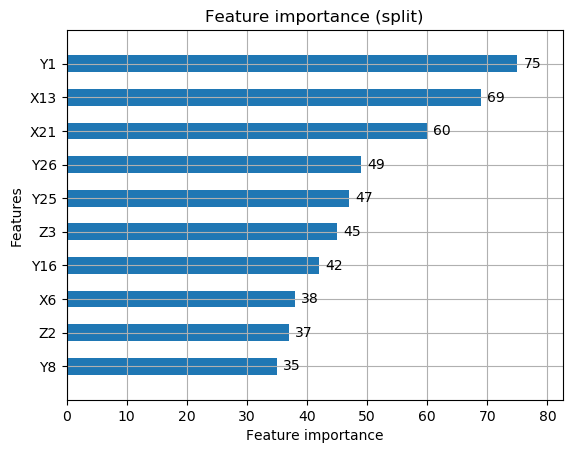

In [6]:
lgb.plot_importance(model,
                    title='Feature importance (split)',
                    xlabel='Feature importance',
                    ylabel='Features',
                    importance_type='split',
                    height=0.5,
                    max_num_features=10)

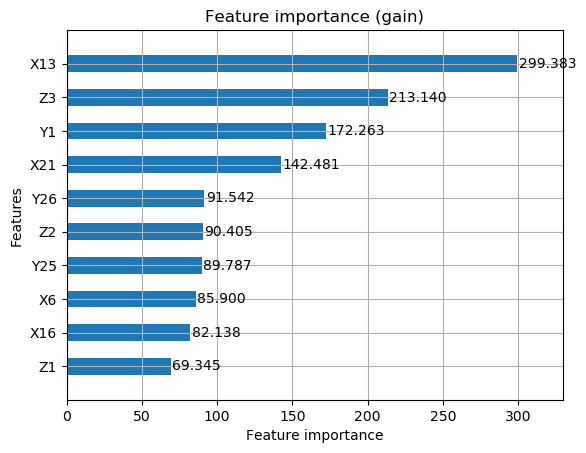

In [7]:
lgb.plot_importance(model,
                    title='Feature importance (gain)',
                    xlabel='Feature importance',
                    ylabel='Features',
                    importance_type='gain',
                    height=0.5,
                    max_num_features=10)

## 4.1


在2022年世界杯足球赛中，对

- 77项技战术指标（X1-X50，Y1-Y27）
- 7项体能指标（Z1-Z7）
- 2项裁判执法指标（W1-W2）

的重要新进行排序。


结果发现，对足球比赛结果起决定性影响的指标是

1. “进球数”（X2，进攻技战术指标），远远高于其他指标的重要性；
2. “助攻次数”（X7，进攻技战术指标），远远高于除“进球数”外的其他指标。


由于以上两个特征直接与比赛结果相关，重要性过于突出，因此在排除以上两个特征后对剩余特征进行分析，从上面两“特征重要性”图可知：

3. “传接配合”（X13，进攻技战术指标）
4. “防守突破次数”（Y1，防守技战术统计）
5. “界外球”（X21，进攻技战术指标）

其他的重要因素包括：

- “围抢”（Y26，防守技战术统计）
- “高速次数”（Z3，体能）
- “冲刺距离”（Z2，体能）
- “进攻转换”（X16，进攻技战术指标）

In [8]:
feature_name = model.feature_name_  # feature_name() for Python API
model.booster_.feature_importance(importance_type='gain')
feature_importance = model.feature_importances_  # feature_importance('gain') for Python API
print('Feature and its importance (X2 and X7 has been removed):')
for feature in zip(feature_name, feature_importance):
    print(feature)

strategy_importance = sum(feature_importance[0:77])
print("技战术重要性：", strategy_importance)
stamina_importance = sum(feature_importance[77:-2])
print("体能重要性：", stamina_importance)
referee_importance = sum(feature_importance[-2:])
print("裁判执法重要性：", referee_importance)

Feature and its importance (X2 and X7 has been removed):
('X1', 18.237006068229675)
('X3', 14.834570050239563)
('X4', 38.76042897999287)
('X5', 0.0)
('X6', 85.89993703365326)
('X8', 52.006179720163345)
('X9', 20.637389063835144)
('X10', 15.649190187454224)
('X11', 29.71149319410324)
('X12', 23.579756796360016)
('X13', 299.3826037753606)
('X14', 20.459965020418167)
('X15', 0.0)
('X16', 82.13805443048477)
('X17', 2.950860023498535)
('X18', 4.8939066380262375)
('X19', 30.734310805797577)
('X20', 18.630982160568237)
('X21', 142.48117639741395)
('X22', 0.0)
('X23', 20.895576059818268)
('X24', 1.2657399624586105)
('X25', 15.302511096000671)
('X26', 19.522469013929367)
('X27', 0.0)
('X28', 43.788525223731995)
('X29', 18.26698014140129)
('X30', 22.75864465534687)
('X31', 5.455939888954163)
('X32', 10.211489915847778)
('X33', 4.379527032375336)
('X34', 16.321534991264343)
('X35', 6.324679851531982)
('X36', 0.0)
('X37', 3.5269269943237305)
('X38', 5.012847065925598)
('X39', 30.936386853456497)
(

## 4.2


综上分析，从重要度来看，“技战术”重要性远远高于“体能”及“裁判执法”重要性。同时从4.1节的结果来看，前5项指标中有4项来自进攻技战术指标，也得以印证。

In [9]:
! pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


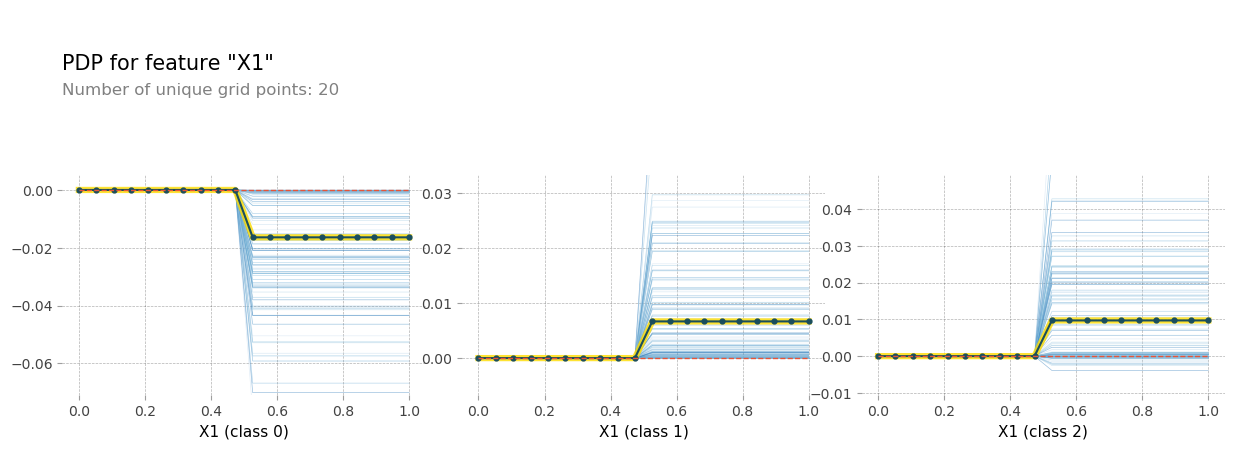

In [10]:
from matplotlib import pyplot as plt
from pdpbox import pdp

# PDP for X1

feature = 'X1'  # 控球率
pdp_pts = pdp.pdp_isolate(model=model,
                          dataset=X,
                          model_features=model.feature_name_,
                          feature=feature,
                          grid_type='equal',
                          num_grid_points=20,
                          grid_range=(0.0,1.0))
pdp.pdp_plot(pdp_isolate_out=pdp_pts,
             feature_name=feature,
             plot_lines=True,
             ncols=3)
plt.show()

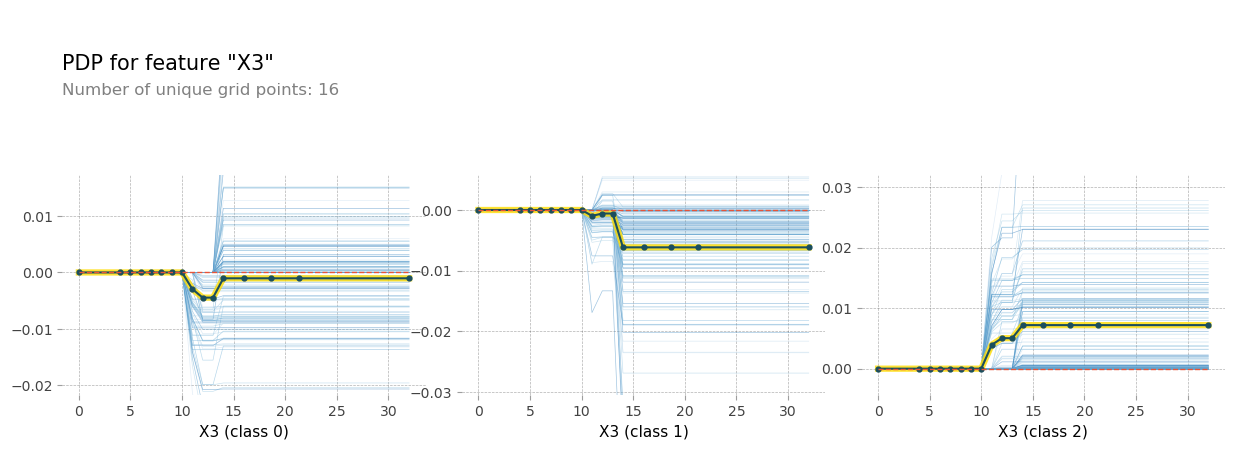

In [11]:
# PDP for X3 射门数

feature = 'X3'
pdp_pts = pdp.pdp_isolate(model=model,
                          dataset=X,
                          model_features=model.feature_name_,
                          feature=feature,
                          grid_type='percentile',
                          num_grid_points=20)
pdp.pdp_plot(pdp_isolate_out=pdp_pts,
             feature_name=feature,
             plot_lines=True,
             ncols=3)
plt.show()

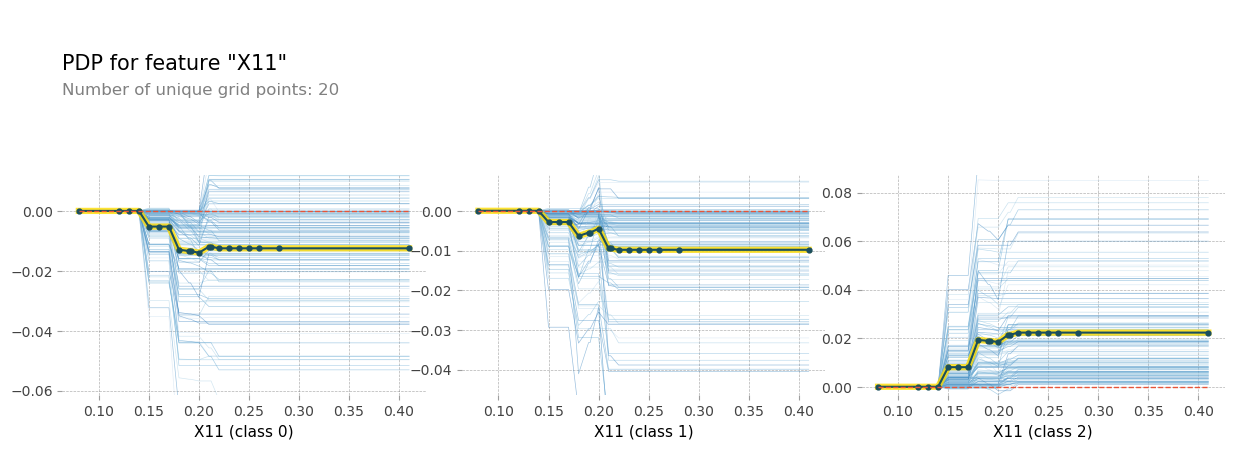

In [12]:
# PDP for X11 攻入对方禁区

feature = 'X11'
pdp_pts = pdp.pdp_isolate(model=model,
                          dataset=X,
                          model_features=model.feature_name_,
                          feature=feature,
                          grid_type='percentile',
                          num_grid_points=20)
pdp.pdp_plot(pdp_isolate_out=pdp_pts,
             feature_name=feature,
             plot_lines=True,
             ncols=3)
plt.show()

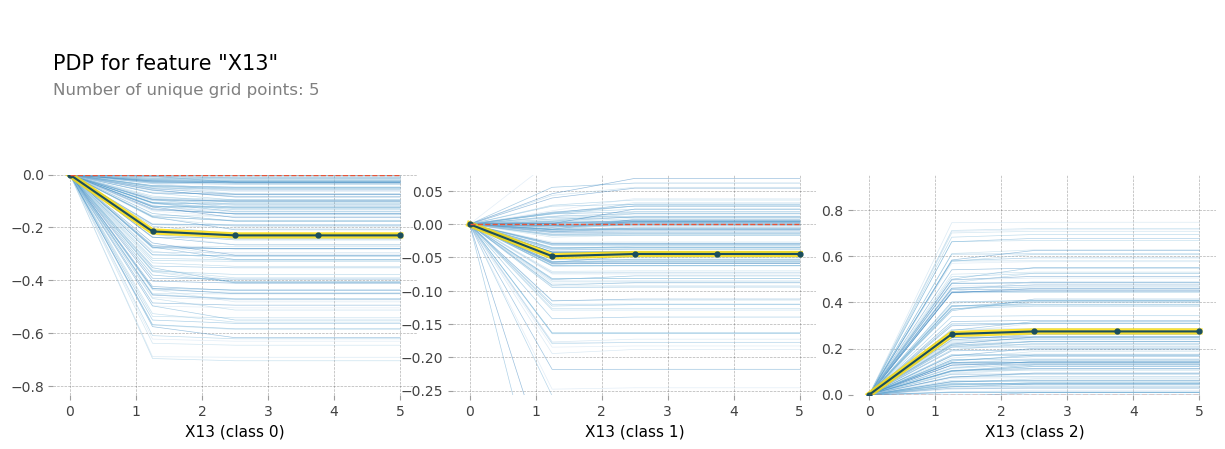

In [13]:
# PDP for X13 传接配合

feature = 'X13'
pdp_pts = pdp.pdp_isolate(model=model,
                          dataset=X,
                          model_features=model.feature_name_,
                          feature=feature,
                          grid_type='equal',
                          num_grid_points=5)
pdp.pdp_plot(pdp_isolate_out=pdp_pts,
             feature_name=feature,
             plot_lines=True,
             ncols=3)
plt.show()

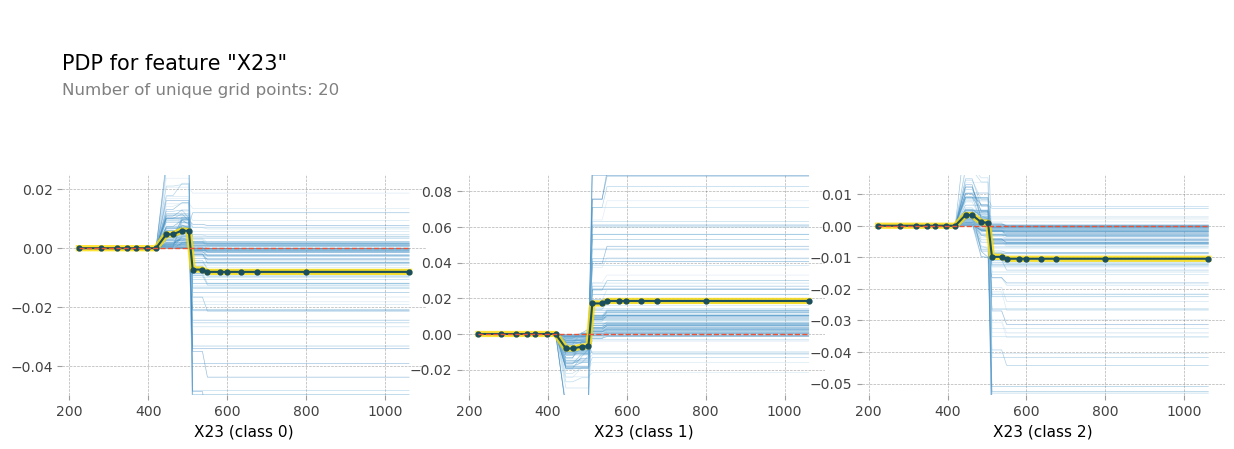

In [14]:
# PDP for X23 传球总数

feature = 'X23'
pdp_pts = pdp.pdp_isolate(model=model,
                          dataset=X,
                          model_features=model.feature_name_,
                          feature=feature,
                          grid_type='percentile',
                          num_grid_points=20)
pdp.pdp_plot(pdp_isolate_out=pdp_pts,
             feature_name=feature,
             plot_lines=True,
             ncols=3)
plt.show()

(<Figure size 1500x500 with 4 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa4b010c430>,
  'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7fa4afc240d0>,
   <matplotlib.axes._subplots.AxesSubplot at 0x7fa4afe5e470>]})

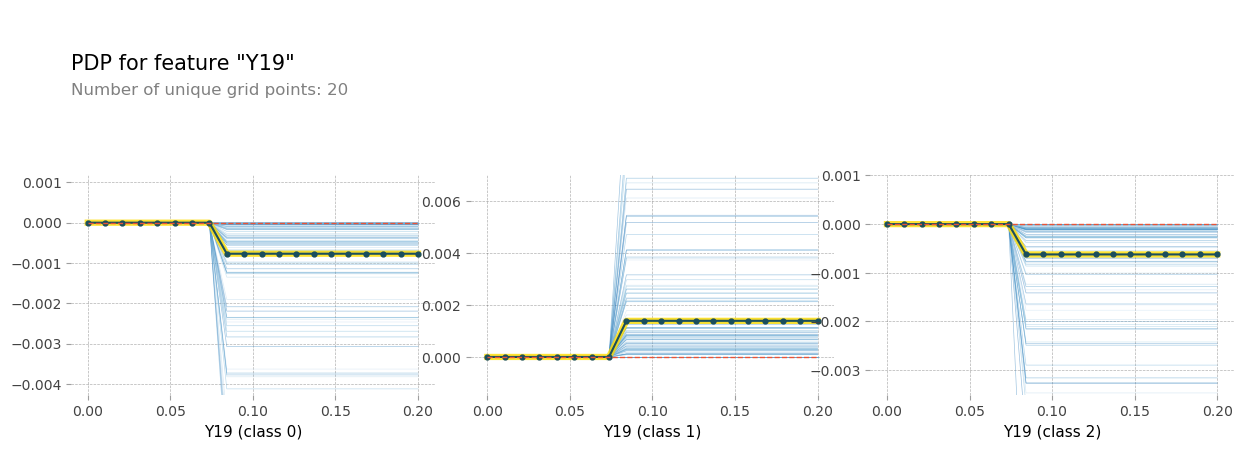

In [15]:
# PDP for Y19 就地反抢

feature = 'Y19'
pdp_pts = pdp.pdp_isolate(model=model,
                          dataset=X,
                          model_features=model.feature_name_,
                          feature=feature,
                          grid_type='equal',
                          num_grid_points=20,
                          grid_range=(0.0,0.2))
pdp.pdp_plot(pdp_isolate_out=pdp_pts,
             feature_name=feature,
             plot_lines=True,
             ncols=3)
# PDP for Y19 就地反抢# PDP for Y19 就地反抢plt.show()

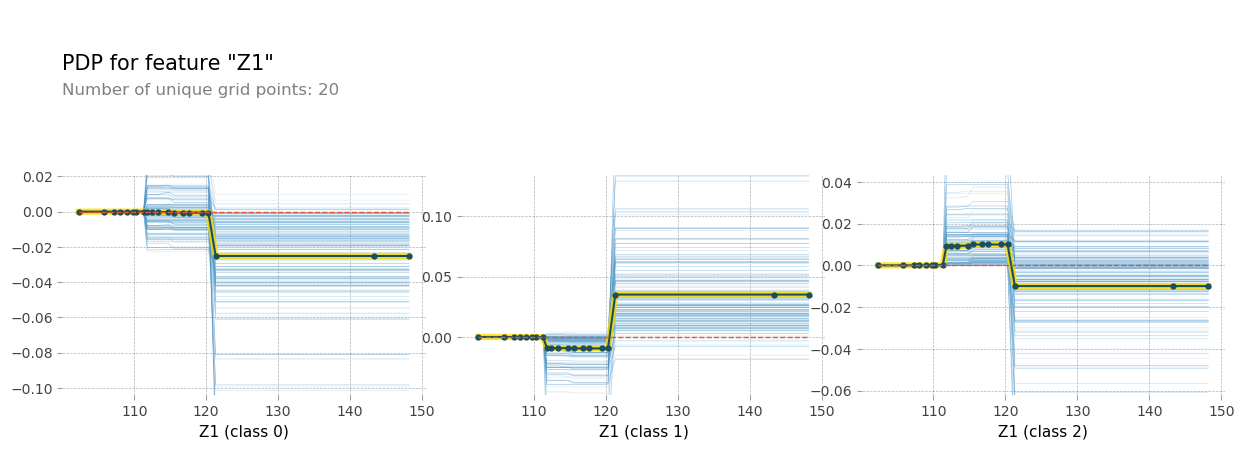

In [16]:
# PDP for Z1 总跑动距离

feature = 'Z1'
pdp_pts = pdp.pdp_isolate(model=model,
                          dataset=X,
                          model_features=model.feature_name_,
                          feature=feature,
                          grid_type='percentile',
                          num_grid_points=20)
pdp.pdp_plot(pdp_isolate_out=pdp_pts,
             feature_name=feature,
             plot_lines=True,
             ncols=3)
plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


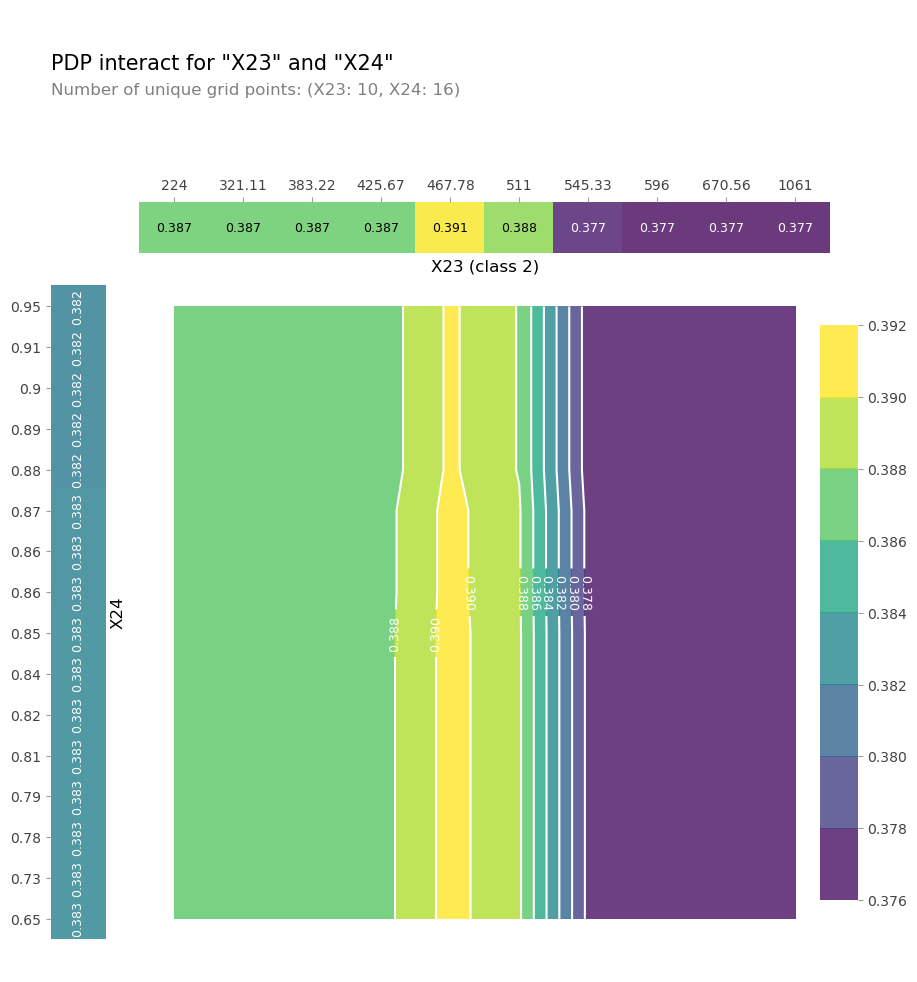

In [17]:
# PDP for X23+X24 传球总数+传球成功率

features_to_plot = ['X23', 'X24']
pdp_inter_pts = pdp.pdp_interact(model=model,
                                 dataset=X,
                                 model_features=model.feature_name_,
                                 features=features_to_plot,
                                 grid_types=['percentile','percentile'],
                                 num_grid_points=[10,20])
pdp.pdp_interact_plot(pdp_interact_out=pdp_inter_pts,
                      feature_names=features_to_plot,
                      plot_type='contour',
                      plot_pdp=True,
                      which_classes=[2])
plt.show()

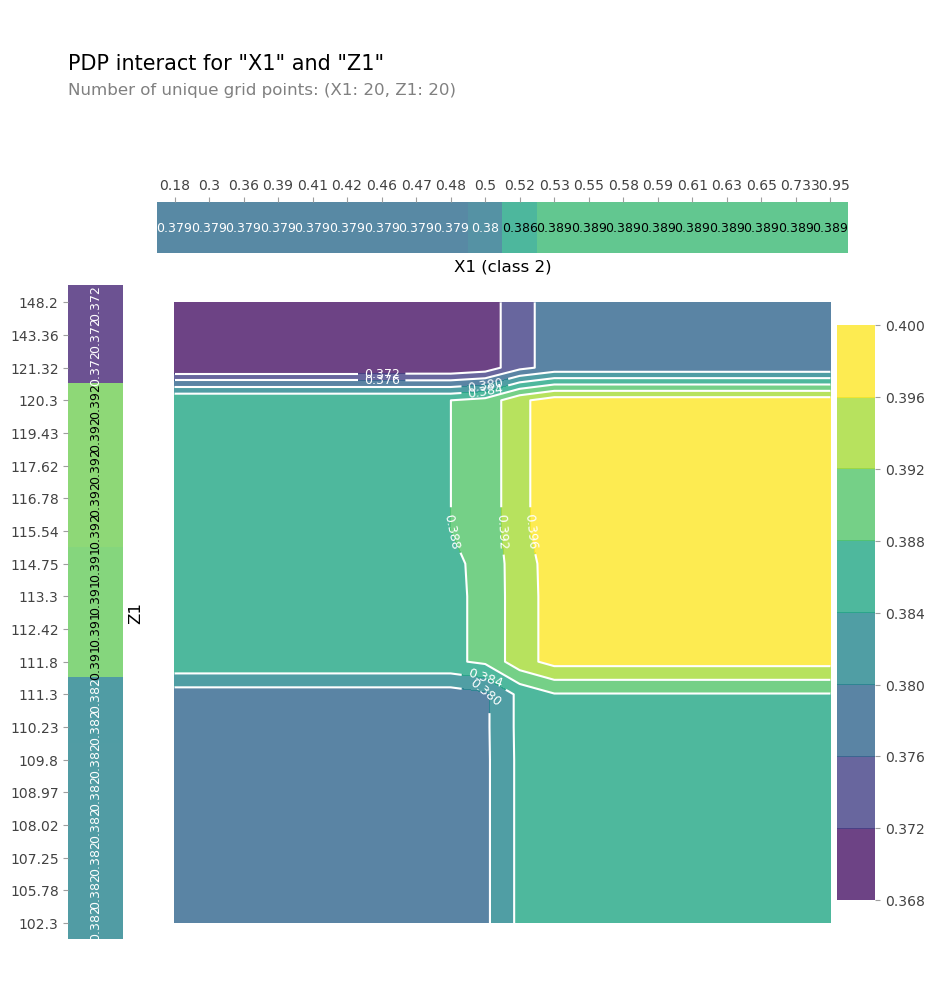

In [18]:
# PDP for X1+Z1 控球率+总跑动距离

features_to_plot = ['X1', 'Z1']
pdp_inter_pts = pdp.pdp_interact(model=model,
                                 dataset=X,
                                 model_features=model.feature_name_,
                                 features=features_to_plot,
                                 grid_types=['percentile','percentile'],
                                 num_grid_points=[20,20])
pdp.pdp_interact_plot(pdp_interact_out=pdp_inter_pts,
                      feature_names=features_to_plot,
                      plot_type='contour',
                      plot_pdp=True,
                      which_classes=[2])
plt.show()

## 4.3

PDP for feature "X1"（控球率）说明，当控球率超过50%时，将更有可能促成“不负”的结果产生。但更高的控球率并不会明显增加赢的概率。
PDP for feature "X3"（射门数）说明，射门次数在10次以上才会明显增加赢球的概率，10次以下的射门几乎不能影响任意一种结果。有趣的是，输球概率最高的时候发生在射门次数在10-15次之间，这一情况下要么输要么赢，机会不太会获得平局。
PDP for feature "X11"（攻入对方禁区）说明，攻入对方禁区至少达到15%才会有效果，并且在18%以上达到最佳效果。
PDP for feature "X13"（传切配合）说明，一次传切配合将极大增加球队获得胜利（class 2）的可能性，但传切配合次数更多似乎不会带来更明显的提升。
PDP for feature "X23"（传球总数）说明，一个很有意思的现象是，如果不考虑传球成功率，传球总数超过500，将几乎注定是平局，而在传球400脚-500脚之间则更有可能提出胜负场。
PDP for feature "Y19"（就地反抢）说明，超过8%的就地反抢只能更多的带来平局的结果，这可能意味着，过少的就地反抢给予了对手从容反击的机会，而过多的就地反抢会造成后防线与回撤防守的薄弱，使对手有机可乘。
PDP for feature "Z1"（总跑动距离）说明，在110km到120km之间是最有助赢球的距离，这可能是效率与体能的最佳平衡点。超过120km的总跑动距离将削弱进攻时的效率，甚至意味着更多的防守被动跑动。

PDP interact for "X23" and "X24"(传球总数+传球成功率)说明，传球成功率对赢球（class 2）的影响并没有传球总数显著，传球总数在大约450-490脚之间会对赢球起到最大帮助，
PDP interact for "X1" and "Z1"(控球率+跑动距离)说明，跑动距离在111km-120km之间且控球率在53%以上时，对赢球的帮助最大。而控球率低于50%，同时跑动距离超过121km，则说明球队为了防守疲于奔命，很难取得胜利。